In [20]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import ensemble
import numpy as np
from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import FeatureImportances
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
sns.set()
dataset = datasets.load_iris()

In [3]:
X = dataset.data
y = dataset.target
y_name = dataset.target_names

In [28]:
# print("品種名: ", y_name)
# print("目的変数: ", y)
# print("説明変数: ", X)

品種名:  ['setosa' 'versicolor' 'virginica']
目的変数:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
# データ２分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

まずは普通にロジスティック回帰してみる

In [6]:
# ロジスティック回帰
clf = linear_model.LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [7]:
# 学習結果
a = clf.coef_
b = clf.intercept_

# print("回帰係数: ", a)
# print("切片: ", b)

# その予測精度
print("正則化なしの訓練データでの点数: ", clf.score(X_train,y_train))
print("正則化なしのテストデータでの点数: ", clf.score(X_test, y_test))

正則化なしの訓練データでの点数:  0.9733333333333334
正則化なしのテストデータでの点数:  0.9333333333333333


L2正則化

In [12]:
# ロジスティック回帰 + L2正則化
clf = linear_model.LogisticRegression(random_state=0, penalty='l2', n_jobs=1, C=1.0)
clf.fit(X_train, y_train)

LogisticRegression(n_jobs=1, random_state=0)

In [29]:
# 学習結果
a = clf.coef_
b = clf.intercept_

print("回帰係数: ", a)
print("切片: ", b)

# その予測精度
print("L2正則化の訓練データでの点数: ", clf.score(X_train,y_train))
print("L2正則のテストデータでの点数: ", clf.score(X_test, y_test))

回帰係数:  [[ 0.25186066  1.69538301 -2.21578634 -0.20304167]
 [ 0.          0.          0.          0.        ]
 [-1.67871551 -0.18098947  2.21973789  1.73970271]]
切片:  [ 0.73925838  0.89124842 -1.6305068 ]
L2正則化の訓練データでの点数:  0.9866666666666667
L2正則のテストデータでの点数:  0.96


L1正則化

In [14]:
# ロジスティック回帰 + L1正則化
clf = linear_model.LogisticRegression(random_state=0, penalty='l1', n_jobs=1, C=1.0, solver='saga')
clf.fit(X_train, y_train)

d:\users\izumu\documents\datascience1\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(n_jobs=1, penalty='l1', random_state=0, solver='saga')

In [15]:
# 学習結果
a = clf.coef_
b = clf.intercept_

# print("回帰係数: ", a)
# print("切片: ", b)

# その予測精度
print("L2正則化の訓練データでの点数: ", clf.score(X_train,y_train))
print("L2正則のテストデータでの点数: ", clf.score(X_test, y_test))

L2正則化の訓練データでの点数:  0.9866666666666667
L2正則のテストデータでの点数:  0.96


ランダムフォレストで特徴量の重要度可視化

0=がく片の長さ，1=がく片の幅，2=花弁の長さ，3=花弁の幅 [cm]

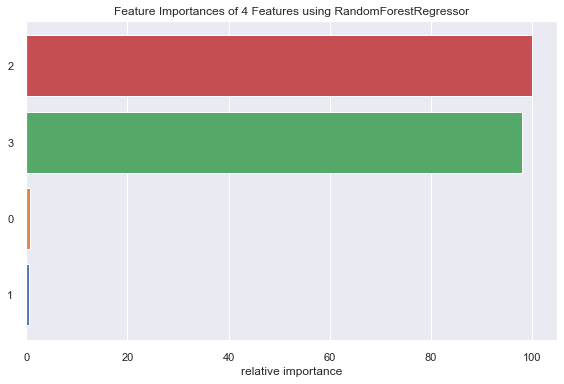

In [31]:
# 回帰木
rf = ensemble.RandomForestRegressor()

viz = FeatureImportances(rf)
viz.fit(X_train, y_train)
viz.show()

LASSO

d:\users\izumu\documents\datascience1\lib\site-packages\yellowbrick\model_selection\importances.py:195: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  YellowbrickWarning,


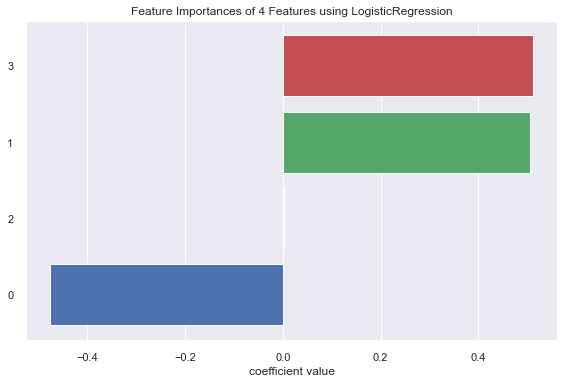

In [30]:
viz = FeatureImportances(clf, relative=False)
viz.fit(X_train, y_train)
viz.show()